In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor 

In [2]:

rf=pd.read_csv(r"C:\Users\Habibulie\Desktop\MyProject\earthquake_data_tsunami.csv")


In [ ]:
rf

In [4]:
print(rf.head())
print(rf.tail())
print(rf.describe(include=['object','number']))
print(rf.isnull().sum()>0.2)
print(rf.info())
print(rf.duplicated().sum())
print(rf.sample(4))
print(rf.corr(numeric_only=True).abs()>0.2)
print(rf.dtypes)

   magnitude  cdi  mmi  sig  nst   dmin   gap    depth  latitude  longitude  \
0        7.0    8    7  768  117  0.509  17.0   14.000   -9.7963    159.596   
1        6.9    4    4  735   99  2.229  34.0   25.000   -4.9559    100.738   
2        7.0    3    3  755  147  3.125  18.0  579.000  -20.0508   -178.346   
3        7.3    5    5  833  149  1.865  21.0   37.000  -19.2918   -172.129   
4        6.6    0    2  670  131  4.998  27.0  624.464  -25.5948    178.278   

   Year  Month  tsunami  
0  2022     11        1  
1  2022     11        0  
2  2022     11        1  
3  2022     11        1  
4  2022     11        1  
     magnitude  cdi  mmi  sig  nst  dmin  gap  depth  latitude  longitude  \
777        7.7    0    8  912  427   0.0  0.0   60.0   13.0490    -88.660   
778        6.9    5    7  745    0   0.0  0.0   36.4   56.7744   -153.281   
779        7.1    0    7  776  372   0.0  0.0  103.0  -14.9280    167.170   
780        6.8    0    5  711   64   0.0  0.0   33.0    6.631

In [ ]:
rf.describe()
rf

In [ ]:
rf.isnull().sum()
rf

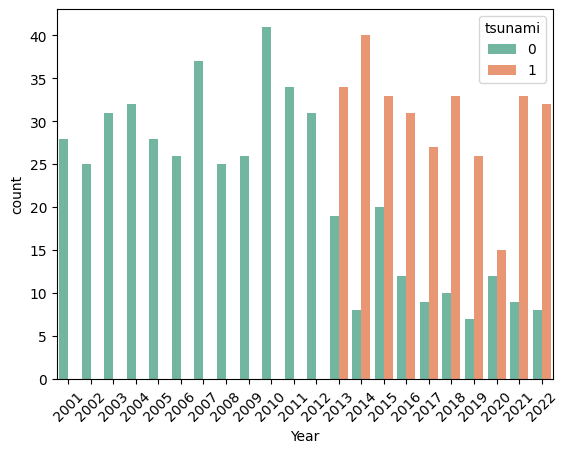

In [ ]:
sns.countplot(x='Year',data=rf, hue='tsunami',palette='Set2')
plt.xticks(rotation=45)

plt.show()

In [ ]:
corr=rf.corr(numeric_only=True)['tsunami'].abs().loc[lambda x: x>0.2]

print(corr[corr >0.3])

nst        0.600231
dmin       0.400752
Year       0.647211
tsunami    1.000000
Name: tsunami, dtype: float64


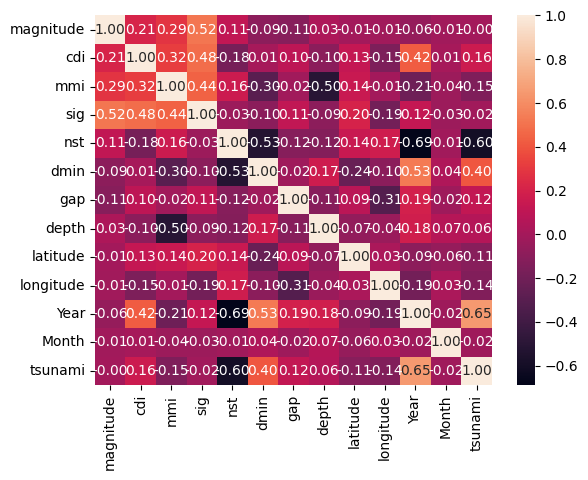

In [ ]:
corr=rf.corr(numeric_only=True)
sns.heatmap(corr,annot=True,fmt='.2f')


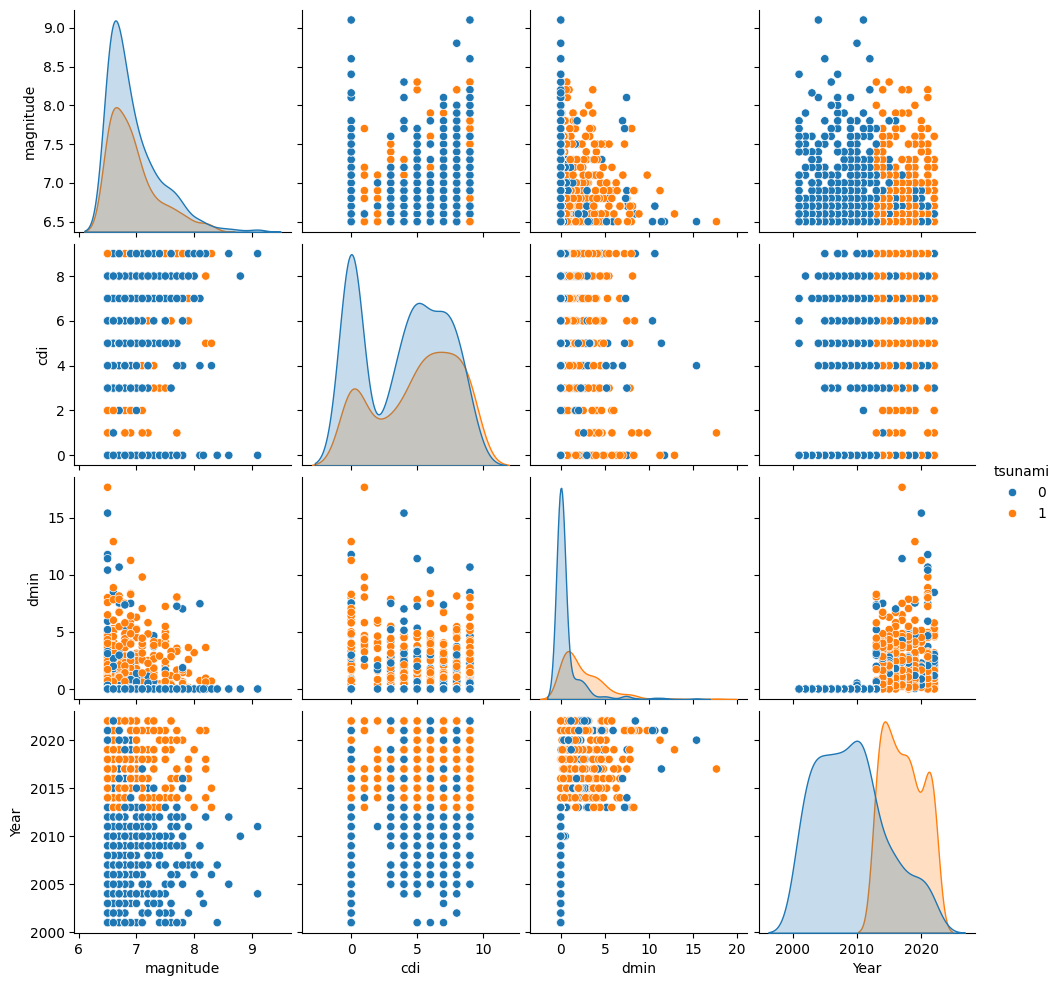

In [ ]:
important_cols = ['magnitude', 'cdi', 'dmin', 'Year', 'tsunami']
sns.pairplot(rf[important_cols], hue='tsunami')



In [ ]:
corr=rf.corrwith(rf['tsunami'])


In [ ]:
corr=rf.corr(method='spearman', numeric_only=True)



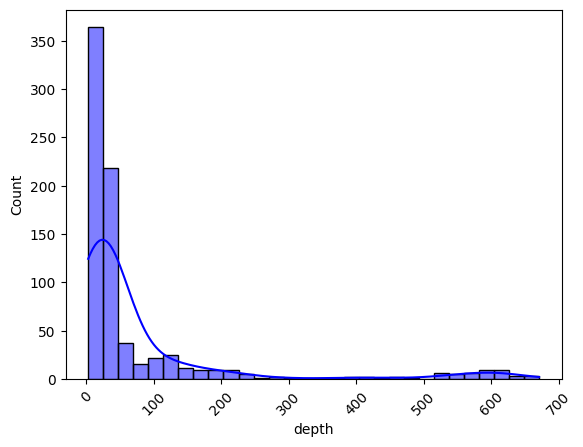

In [ ]:
sns.histplot(rf['depth'],kde=True, bins=30,color='blue')
plt.xticks(rotation=45)

plt.show()

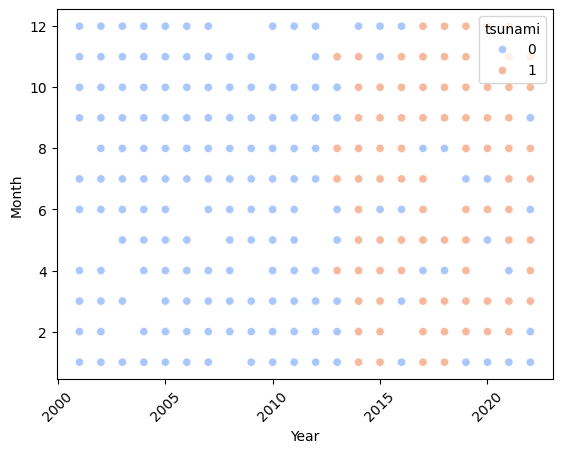

In [14]:
sns.scatterplot(data=rf,x='Year',y='Month',hue='tsunami', alpha=1,palette='coolwarm')
plt.xticks(rotation=45)
plt.show()

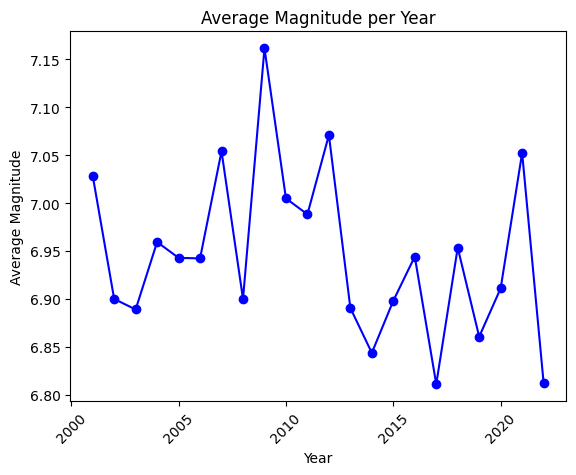

In [ ]:
grouped_data = rf.groupby('Year')['magnitude'].mean()

grouped_data.plot(kind='line', color='blue',marker='o')
plt.title('Average Magnitude per Year')
plt.xlabel('Year')
plt.ylabel('Average Magnitude')
plt.xticks(rotation=45)

plt.show()

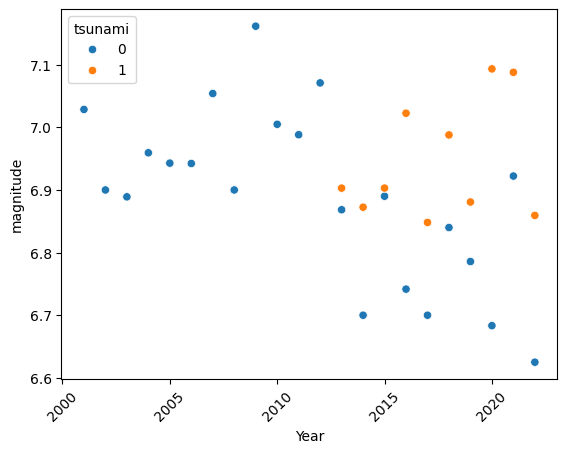

In [16]:
grouped_data=rf.groupby(['Year','tsunami'])['magnitude'].mean().reset_index()
sns.scatterplot(data=grouped_data,x='Year',hue='tsunami',y='magnitude')
plt.xticks(rotation=45)
plt.show()

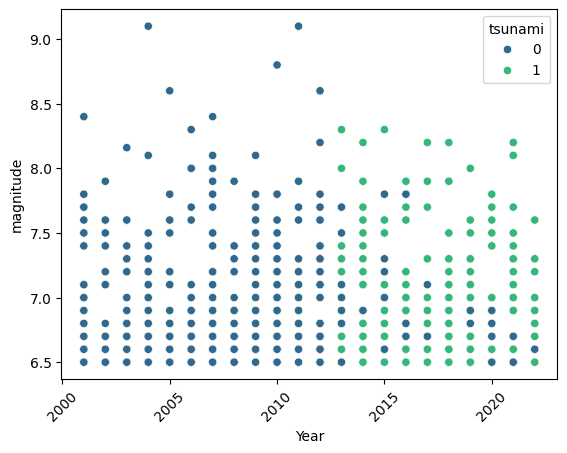

In [17]:
sns.scatterplot(data=rf,x='Year',y='magnitude',hue='tsunami',palette='viridis')
plt.xticks(rotation=45)
plt.show()

In [18]:
print(rf['tsunami'].value_counts())
percentage=rf['tsunami'].value_counts(normalize=True)*100
print(percentage)


tsunami
0    478
1    304
Name: count, dtype: int64
tsunami
0    61.12532
1    38.87468
Name: proportion, dtype: float64


In [19]:
corr=rf.corr(numeric_only=True)['tsunami'].abs().loc[lambda x: x>0.2]
print(corr)

corr2=rf.corr(numeric_only=True)['tsunami'].abs()
print(corr2[corr2> 0.2])

nst        0.600231
dmin       0.400752
Year       0.647211
tsunami    1.000000
Name: tsunami, dtype: float64
nst        0.600231
dmin       0.400752
Year       0.647211
tsunami    1.000000
Name: tsunami, dtype: float64


In [20]:
x=rf.drop('tsunami',axis=1)
y=rf['tsunami']



In [ ]:
rrf=SMOTE(random_state=42)
x_res,y_res=rrf.fit_resample(x,y)



In [22]:
x_train,x_test,y_train,y_test=train_test_split(x_res,y_res, test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)


In [23]:
print("model\n:",LinearRegression)
print("MSE:",mean_squared_error(y_test,pred))
print("MBE\n:",mean_absolute_error(y_test,pred))
print("r2\n:", r2_score(y_test,pred))

model
: <class 'sklearn.linear_model._base.LinearRegression'>
MSE: 0.13333065907690073
MBE
: 0.27638112856598557
r2
: 0.46661948820283583


In [38]:
results=[]
models={
    'Lineargression': LinearRegression(),
    'svm': SVR(),
    'xgboost': XGBRFRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
for name,model in models.items():
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)

    print(f"\n the model names:{name}")
    print("MSE:",mean_squared_error(y_test,prediction))
    print("MAE\n:",mean_absolute_error(y_test,prediction))
    print("r2\n:", r2_score(y_test,prediction))



    results.append({
    'Model': name,
    'MSE':mean_squared_error(y_test,prediction),
    'MAE':mean_absolute_error(y_test,prediction),
    'r2': r2_score(y_test,prediction)
   })

result_df=pd.DataFrame(results)
result_df.to_csv(r"C:\Users\Habibulie\Desktop\MyAnalysis\data\processed\models_comparison.csv",index=False)


 the model names:Lineargression
MSE: 0.13333065907690073
MAE
: 0.27638112856598557
r2
: 0.46661948820283583

 the model names:svm
MSE: 0.1545224533012242
MAE
: 0.25195756188282964
r2
: 0.3818431124800513

 the model names:xgboost
MSE: 0.04085609316825867
MAE
: 0.09584615379571915
r2
: 0.8365578651428223

 the model names:Random Forest
MSE: 0.03762864583333333
MAE
: 0.08171874999999999
r2
: 0.8494690830168204


In [25]:
model=RandomForestRegressor(random_state=42)
scores=cross_val_score(model,x_res,y_res,cv=5,scoring='r2')
print('the validation from the scores\n:',scores)
print('the average of the score\n:',np.mean(scores))

the validation from the scores
: [ 0.37944167  0.41432199 -1.55947625  1.          0.7384049 ]
the average of the score
: 0.19453846262021413


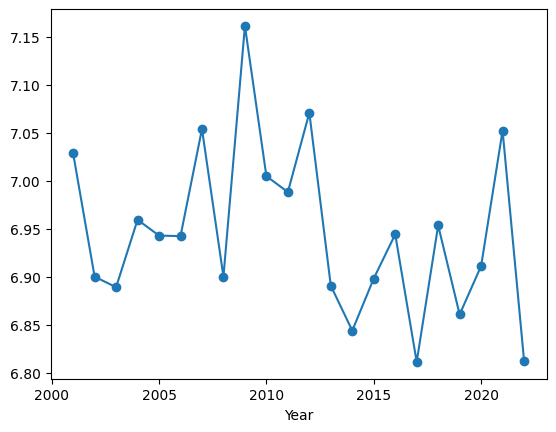

In [ ]:
rf.groupby('Year')['magnitude'].mean().plot(kind='line',marker='o')

plt.show()

In [27]:
best_model=RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
prediction1=model.predict(x_test)
print(f"\n best model:RandomForestRegressor")
print("MSE:",mean_squared_error(y_test,prediction1))
print("MAE\n:",mean_absolute_error(y_test,prediction1))
print("r2\n:", r2_score(y_test,prediction1))



 best model:RandomForestRegressor
MSE: 0.03762864583333333
MAE
: 0.08171874999999999
r2
: 0.8494690830168204


In [28]:
param_grid={
 'n_estimators': [50, 100, 200],      # Number of trees
    'max_depth': [None, 10, 20, 30],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum samples needed to split a node
    'min_samples_leaf': [1, 2, 4],      
}
grid_search=GridSearchCV(RandomForestRegressor(random_state=42),param_grid=param_grid,n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)
prediction2=grid_search.predict(x_test)
prediction2
print("Best parameters:", grid_search.best_params_)
print("Best R2 score:", grid_search.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best R2 score: 0.8019976821918251


In [29]:
model=RandomForestRegressor(
    n_estimators=grid_search.best_params_['n_estimators'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    random_state=42
)

In [30]:
model.fit(x_train,y_train)
prediction=model.predict(x_test)
print("MSE:",mean_squared_error(y_test,prediction))
print("MAE\n:",mean_absolute_error(y_test,prediction))
print("r2\n:", r2_score(y_test,prediction))


MSE: 0.038243177493566545
MAE
: 0.08313725676208764
r2
: 0.8470106896231322


In [ ]:
model=RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)
importance=model.feature_importances_
new_rff=pd.DataFrame({
 'feature': x.columns,
 'importance':importance
})
new_rff

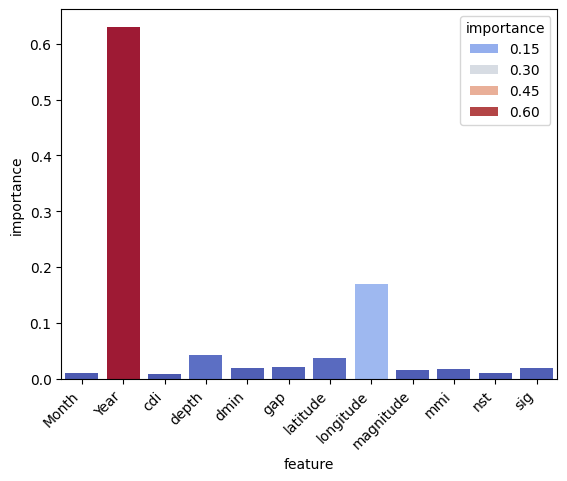

In [ ]:
grouped_data=new_rff.groupby('feature')['importance'].mean().reset_index()

sns.barplot(x='feature',y='importance',data=grouped_data,hue='importance',palette='coolwarm')
plt.xticks(rotation=45,ha='right')


plt.show()
plt.close()